# Healthcare EDA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Analysis

In [ ]:
df = pd.read_excel('Healthcare_dataset.xlsx')
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [ ]:
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

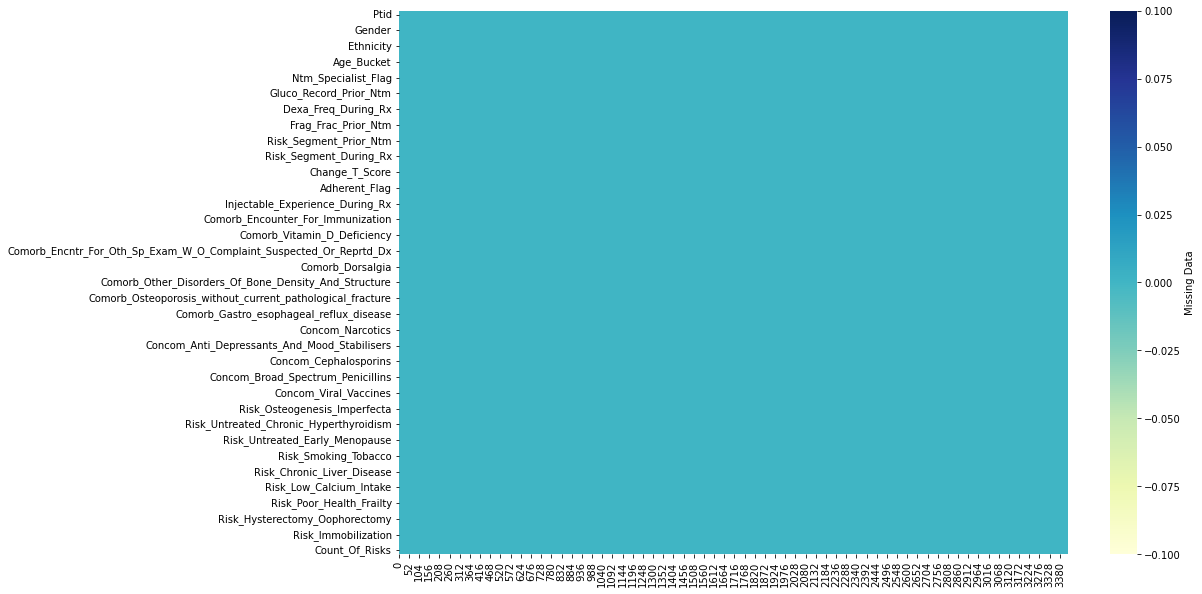

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

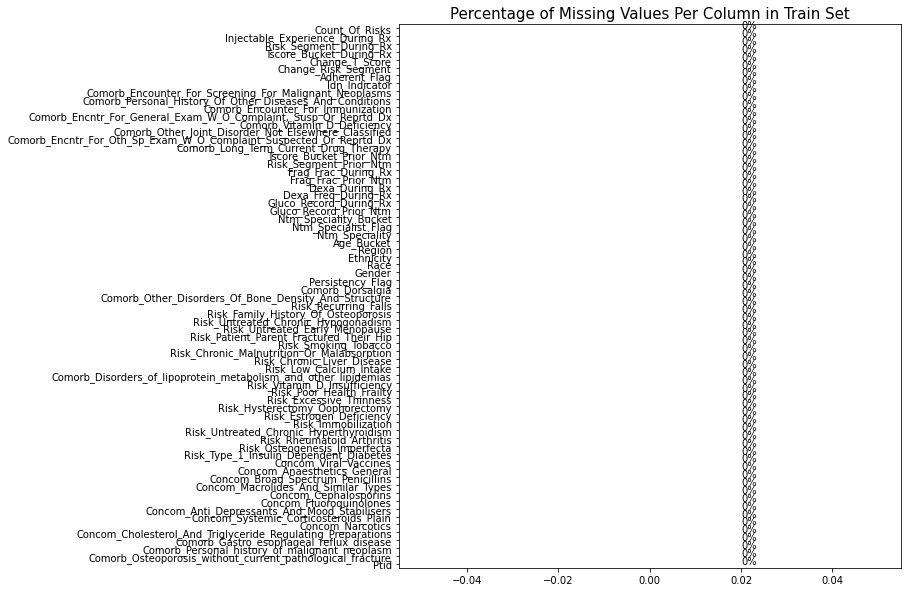

In [ ]:
ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

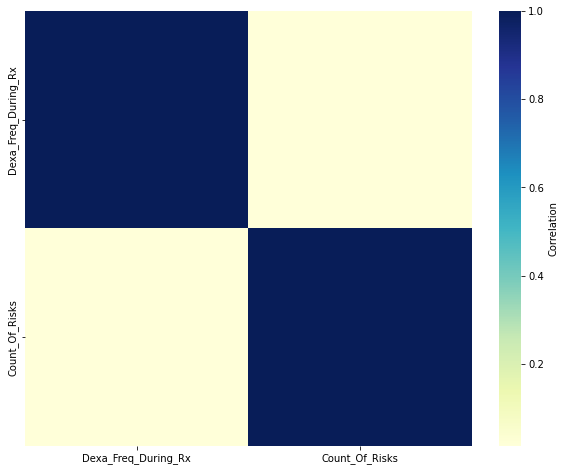

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Correlation'})

### Outliers

In [ ]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_df = numerical_columns_selector(df)
categorical_df = categorical_columns_selector(df)

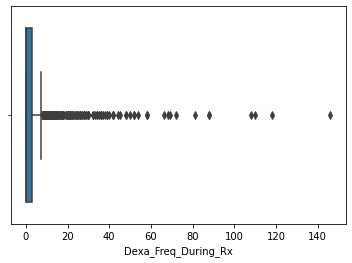

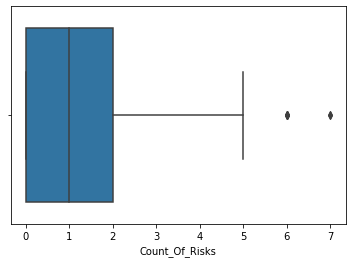

In [ ]:
for num in numerical_df:
    plt.figure()
    sns.boxplot(x = df[num])

In [ ]:
for cat in categorical_df:
        plt.figure(figsize=(10,7))
        sns.countplot(y=df[cat], orient='horizontal')
        #plt.title('Count plot of ' + cat)
        plt.xlabel('Count') 
        plt.show()

### Skew

In [ ]:
from scipy.stats import skew
import scipy.stats as stats

In [ ]:
#df_skew = df[numerical_df].skew(axis = 0, skipna = True)
#df_skew[0]
#df.skew(axis = 1, skipna = True)

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    df_skew = df[variable].skew(axis = 0, skipna = True)
    sns.distplot(df[variable], bins=30);
    plt.title('Histogram'+' ' + ', skew:' + str(df_skew) )

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 864x576 with 0 Axes>

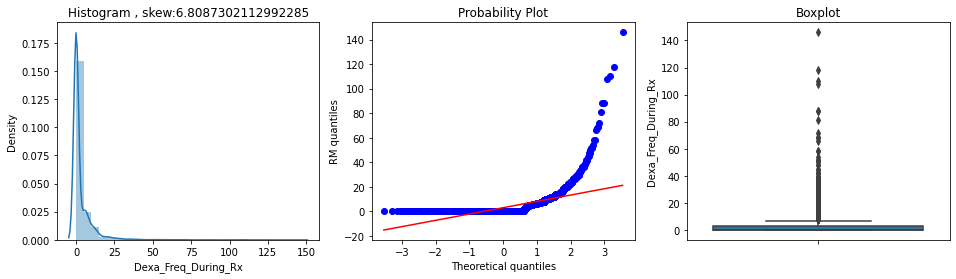

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 864x576 with 0 Axes>

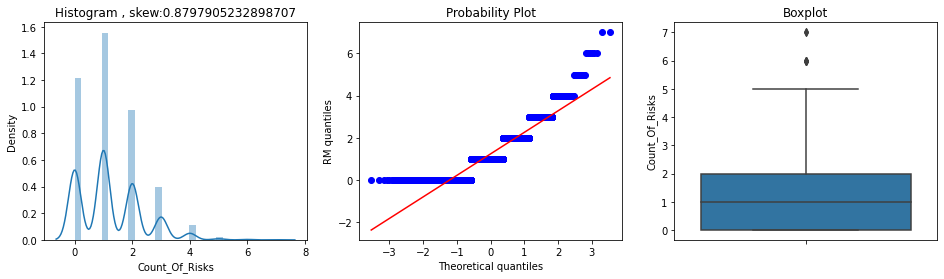

In [ ]:
for i,num in enumerate(numerical_df):
    plt.figure(figsize=(12,8))
    diagnostic_plots(df, num)

### Unknown - Replace with Mode

In [ ]:
# list columns with Unknown
columns = df.columns.to_list()
l_Unknown = []
for col in columns:
  arr = df[col].unique()
  if np.where(arr=='Unknown')[0].size != np.array(0):
    l_Unknown.append(col)
  else:
    continue

In [ ]:
df[l_Unknown].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ethnicity                3424 non-null   object
 1   Ntm_Speciality           3424 non-null   object
 2   Risk_Segment_During_Rx   3424 non-null   object
 3   Tscore_Bucket_During_Rx  3424 non-null   object
 4   Change_T_Score           3424 non-null   object
 5   Change_Risk_Segment      3424 non-null   object
dtypes: object(6)
memory usage: 160.6+ KB


In [ ]:
dfn = df.copy()
columns = dfn.columns

In [ ]:
dfn['Ethnicity'].value_counts()

Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64

In [ ]:
obj_rem=[]
# if Unknown values are 40% more than total size .... remove , if not ... replace with mode
for l in l_Unknown:
    val = dfn[l].value_counts().Unknown
    if val>len(dfn)*0.4:
        #l_Unknown.remove(l)
        dfn.drop(l , axis=1 , inplace=True)
        obj_rem.append(l)
    else:
        dfn[l].replace(to_replace='Unknown', value=dfn[l].mode()[0], inplace=True)
#print(l_Unknown)
dfn['Race'].replace(to_replace='Other/Unknown', value=dfn['Race'].mode()[0], inplace=True)

### Remove outliers

In [ ]:
dfo = dfn.copy()

In [ ]:
numerical_df

['Dexa_Freq_During_Rx', 'Count_Of_Risks']



```
for num in numerical_df:
    #quantils
    Q1=dfn[num].quantile(0.25)
    Q3=dfn[num].quantile(0.75)
    IQR=Q3-Q1

    #upper_lower
    lower_bound= Q1 - 1.5*IQR
    upper_bound= Q3 + 1.5*IQR

    #outlier
    outliers= (dfn[num]< lower_bound) | (dfn[num]> upper_bound)

    #drop outliers
    dfn[num].drop(outliers, axis=0,inplace=True)
```



In [ ]:
cols = numerical_df 

Q1 = dfo[cols].quantile(0.25)
Q3 = dfo[cols].quantile(0.75)
IQR = Q3 - Q1

dfo = dfo[~((dfo[cols] < (Q1 - 1.5 * IQR)) |(dfo[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
dfo.reset_index(drop=True, inplace=True)

In [ ]:
dfo.shape
dfo.drop('Ptid', axis=1, inplace=True)

In [ ]:
dfo.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Caucasian,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1


In [ ]:
dfo.to_csv("healthcare_clean_data.csv",index=False)

### Transforming Categorical Data

In [ ]:
#dfo = pd.read_csv('healthcare_clean_data.csv')
#dfo.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_selector as selector
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_df = numerical_columns_selector(dfo)
categorical_df = categorical_columns_selector(dfo)

dff = dfo.copy()

In [ ]:
# list columns with number
columnso = categorical_df
l_2v = []
l_3vm = []
for col in columnso:
  arr = dfo[col].unique()
  if len(arr) == 2:
    l_2v.append(col)
  else:
    l_3vm.append(col)

#### 2 var

In [ ]:
for dv in l_2v:
    le = LabelEncoder()
    dff[dv] = le.fit_transform(dff[dv])

#### 3 var+

In [ ]:
for dv in l_3vm:
    le = LabelEncoder()
    dff[dv] = le.fit_transform(dff[dv])

In [ ]:
dff.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,1,1,2,1,4,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,4,0,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,1,5,0,1,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,2,1,0,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2,1,0,3,5,0,1,1,...,0,0,0,0,0,0,0,0,0,1


### Save clean and transform data

In [ ]:
dff.to_csv("healthcare_clean_transf_data.csv", index=False)